## SYNTHETIC DATA GENERATION USING SDV - AUTOMOBILE DATA SET 

#### Import Library 

In [1]:
import pandas as pd
import numpy as np
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\GBABU12\Downloads\archive\Automobile.csv", header=0)
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [3]:
df.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [4]:
df.rename(columns={'mpg': 'fuel_efficiency_mpg'}, inplace=True)

In [5]:
df

,name,fuel_efficiency_mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [6]:
df.columns 

Index(['name', 'fuel_efficiency_mpg', 'cylinders', 'displacement',
       'horsepower', 'weight', 'acceleration', 'model_year', 'origin'],
      dtype='object')

In [7]:
df=df.drop(columns=['name','model_year','origin'], axis=1)
df

,fuel_efficiency_mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


In [8]:
df

,fuel_efficiency_mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


In [9]:
df.shape

(398, 6)

In [10]:
df.columns

Index(['fuel_efficiency_mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration'],
      dtype='object')

In [11]:
df = df.apply(pd.to_numeric, errors='coerce').astype(float)

In [12]:
df

,fuel_efficiency_mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8.0,307.0,130.0,3504.0,12.0
1,15.0,8.0,350.0,165.0,3693.0,11.5
2,18.0,8.0,318.0,150.0,3436.0,11.0
3,16.0,8.0,304.0,150.0,3433.0,12.0
4,17.0,8.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6
394,44.0,4.0,97.0,52.0,2130.0,24.6
395,32.0,4.0,135.0,84.0,2295.0,11.6
396,28.0,4.0,120.0,79.0,2625.0,18.6


df.dtypes

In [13]:
df.dtypes

fuel_efficiency_mpg    float64
cylinders              float64
displacement           float64
horsepower             float64
weight                 float64
acceleration           float64
dtype: object

In [14]:
df.columns

Index(['fuel_efficiency_mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration'],
      dtype='object')

In [15]:
feature_cols=['fuel_efficiency_mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration']

In [16]:
output_col =  'fuel_efficiency_mpg'

### SDV Usage 

In [17]:
metadata_1 = SingleTableMetadata()
metadata_1.detect_from_dataframe(df)
ctgan_1 = CTGANSynthesizer(
    metadata=metadata_1,
    epochs=3000,
    batch_size=200,
    verbose=True,
)
ctgan_1.fit(df)
synthetic_1 = ctgan_1.sample(num_rows=600)

C:\Users\GBABU12\ford-py-envs\py312_jupyter_spyder_env\Lib\site-packages\sdv\single_table\base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
C:\Users\GBABU12\ford-py-envs\py312_jupyter_spyder_env\Lib\site-packages\sdv\single_table\base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-1.35) | Discrim. (0.01): 100%|██████████████████████████████████████████████| 3000/3000 [03:08<00:00, 15.96it/s]


In [18]:
losses = ctgan_1.get_loss_values()
print(losses.head())

   Epoch  Generator Loss  Discriminator Loss
0      0        1.679400            0.028616
1      1        1.714084           -0.035195
2      2        1.660347           -0.014731
3      3        1.648092           -0.026799
4      4        1.605455           -0.055118


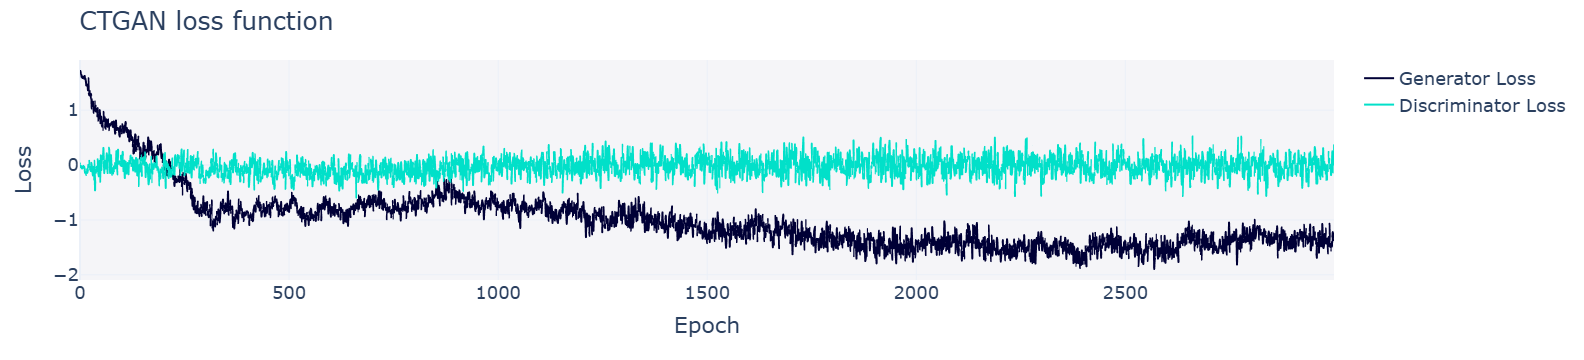

In [19]:
fig = ctgan_1.get_loss_values_plot()
fig.show()

In [ ]:
### Plotting 

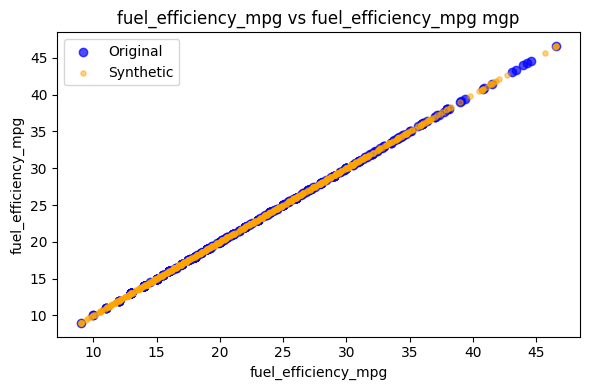

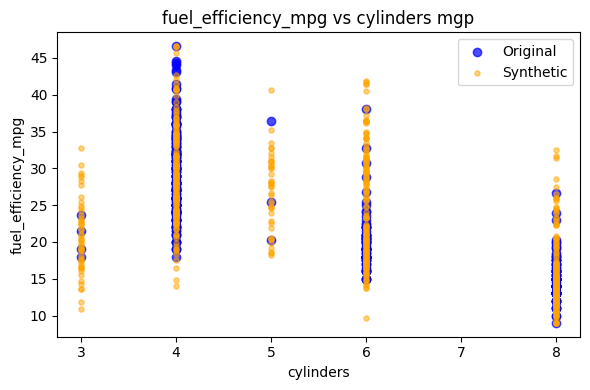

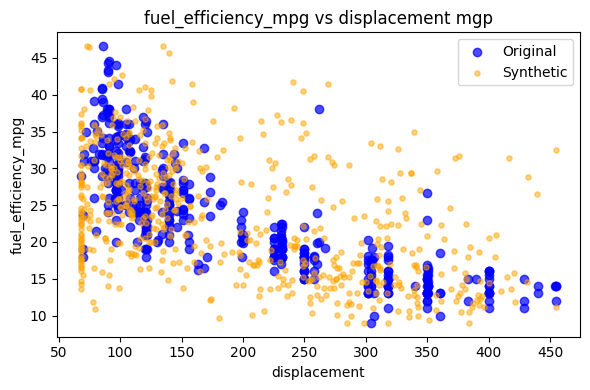

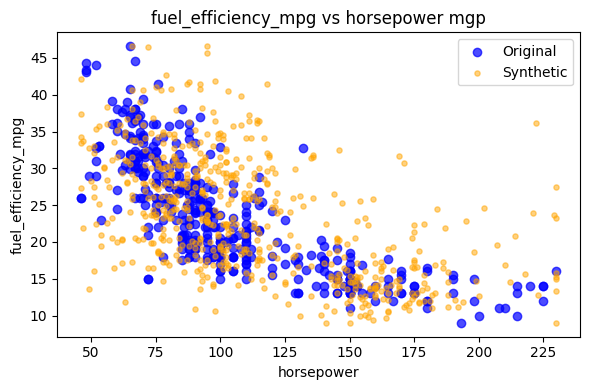

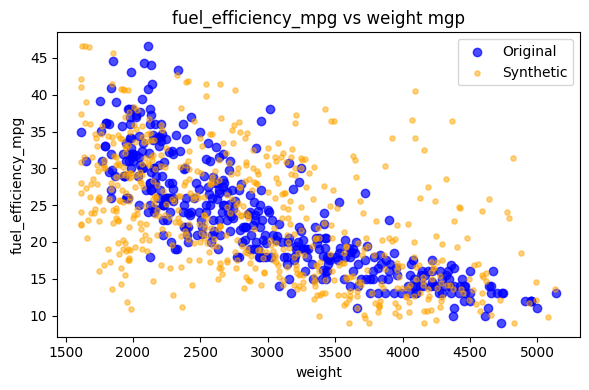

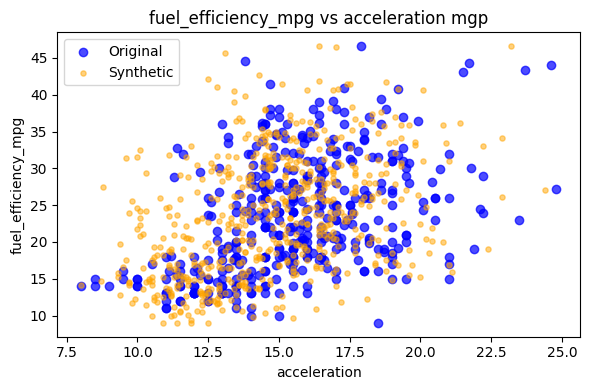

In [23]:
def plot_feature_output_comparison(orig_df, synth_df, features, output_col, title_suffix):
    for feat in features:
        if feat == 'DS TYPE':
            continue
        plt.figure(figsize=(6, 4))
        plt.scatter(orig_df[feat], orig_df[output_col], color='blue', label='Original', alpha=0.7)
        plt.scatter(synth_df[feat], synth_df[output_col], color='orange', label='Synthetic', alpha=0.5, s=14)
        plt.xlabel(feat)
        plt.ylabel(output_col)
        plt.title(f'{output_col} vs {feat} {title_suffix}')
        plt.legend()
        plt.tight_layout()
        plt.show()



plot_feature_output_comparison(df, synthetic_1, feature_cols,'fuel_efficiency_mpg', 'mgp')



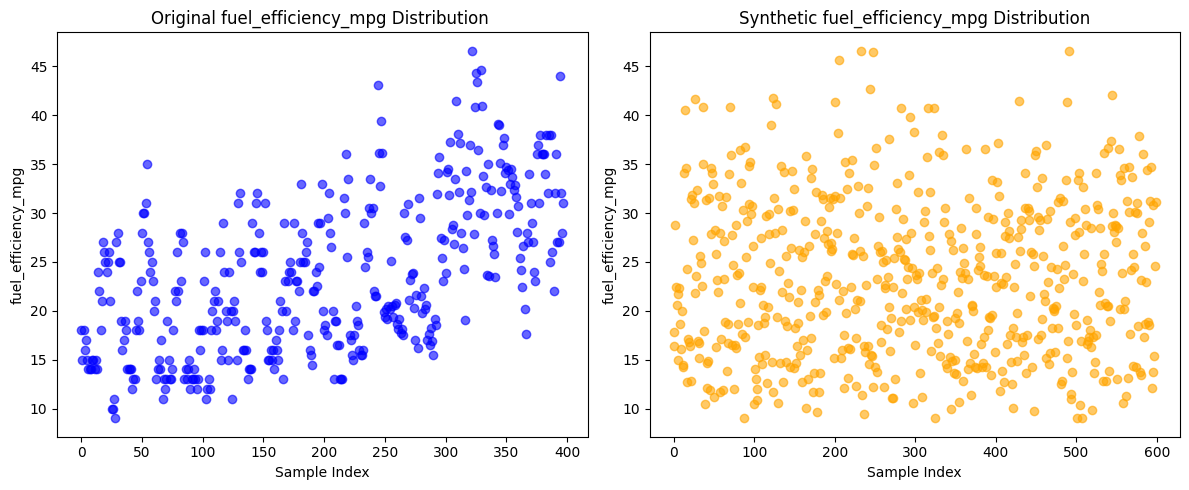

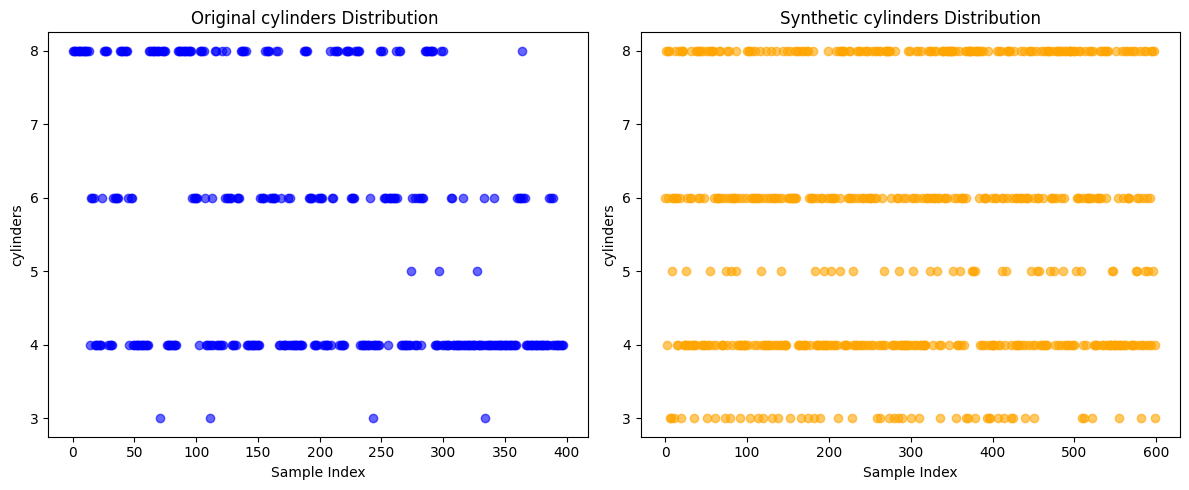

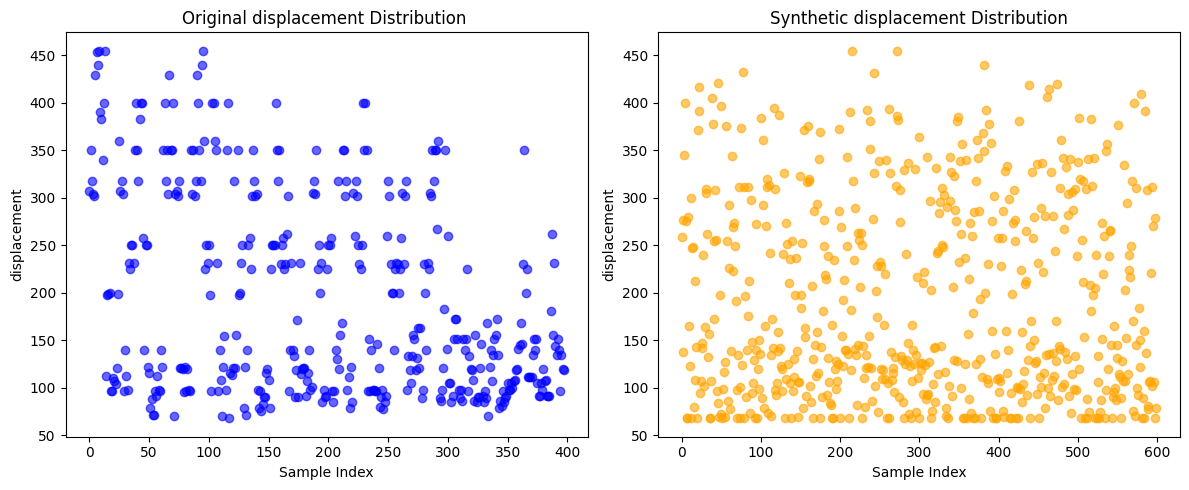

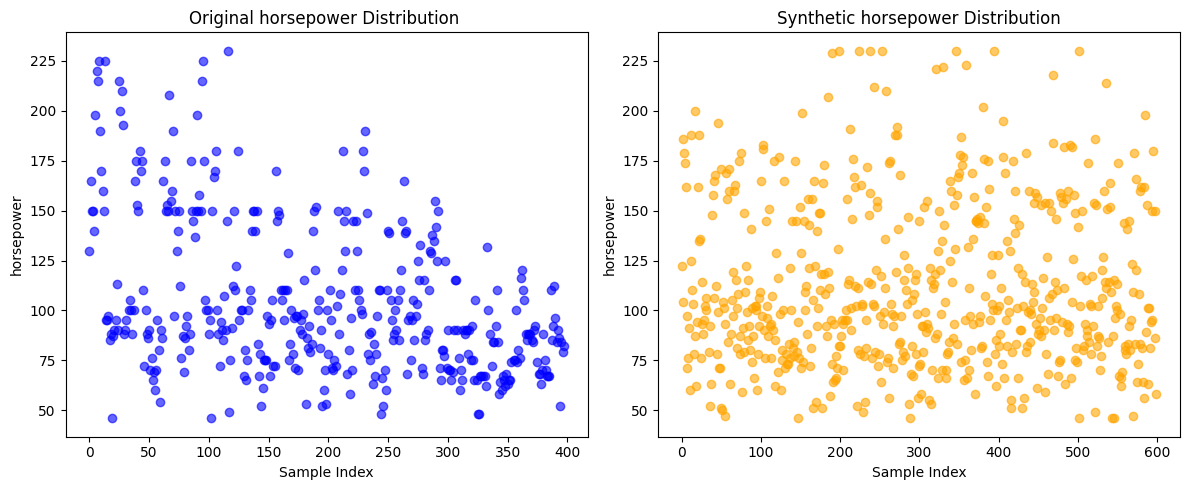

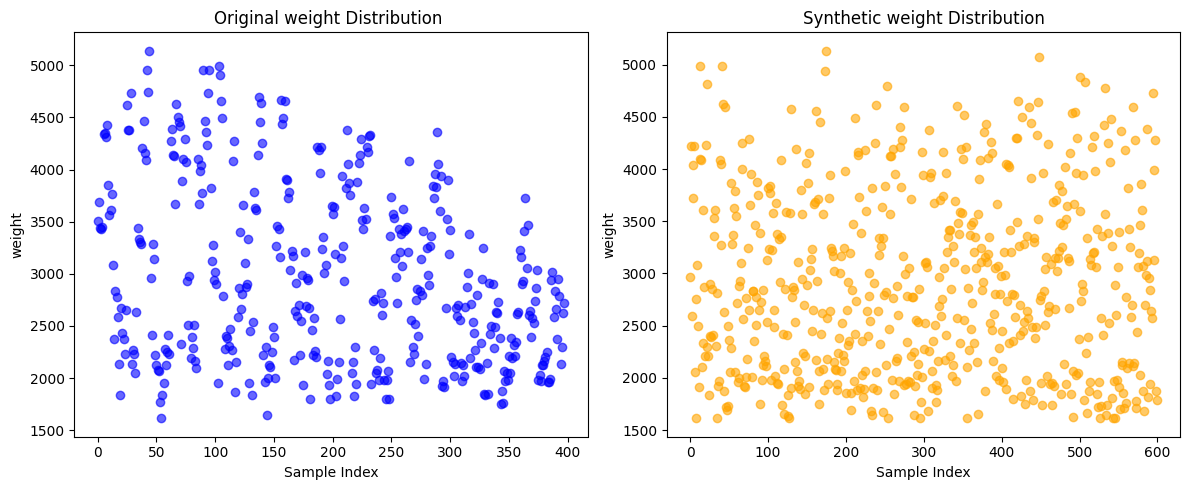

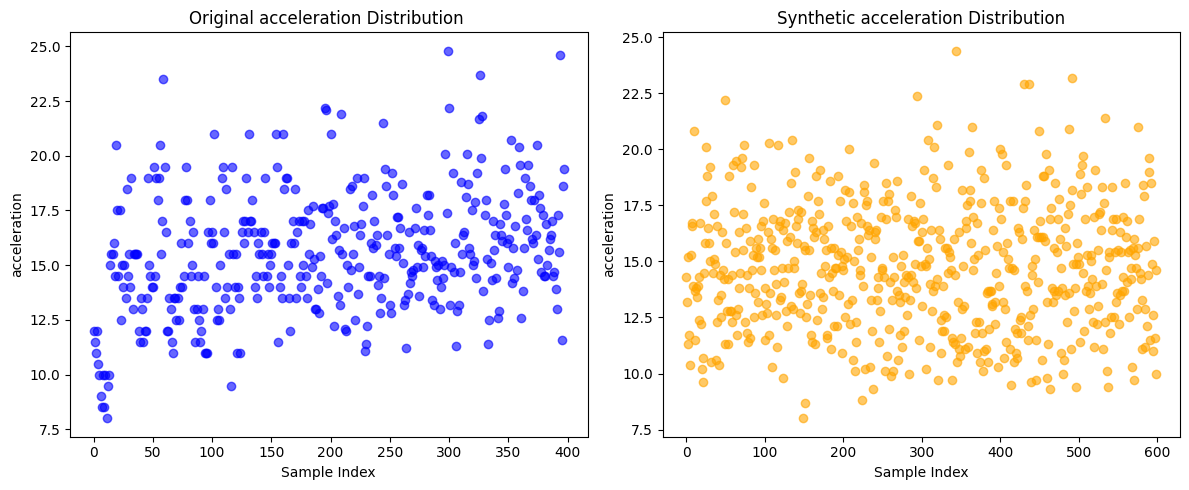

In [24]:
def plot_feature_distribution(orig_df, synth_df, features):
    for feat in features:
        if feat == 'DS TYPE':
            continue
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.scatter(range(len(orig_df)), orig_df[feat], alpha=0.6, color='blue')
        plt.xlabel('Sample Index')
        plt.ylabel(feat)
        plt.title(f'Original {feat} Distribution ')
        
        plt.subplot(1, 2, 2)
        plt.scatter(range(len(synth_df)), synth_df[feat], alpha=0.6, color='orange')
        plt.xlabel('Sample Index')
        plt.ylabel(feat)
        plt.title(f'Synthetic {feat} Distribution')
        
        plt.tight_layout()
        plt.show()

plot_feature_distribution(df, synthetic_1, feature_cols)



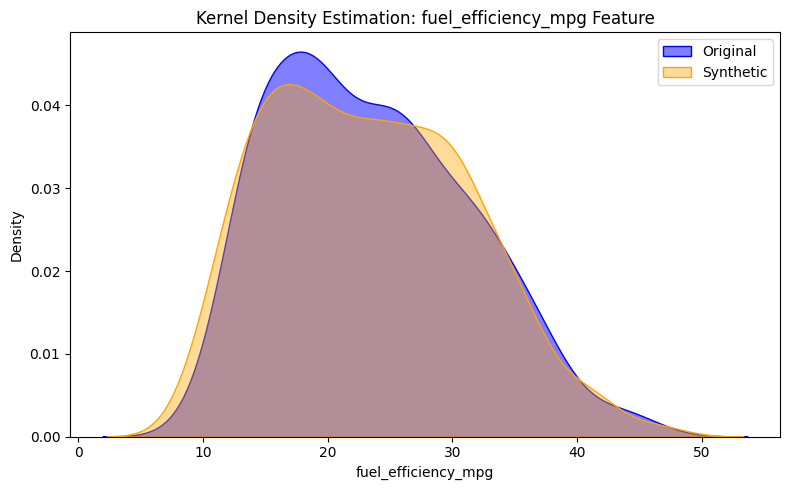

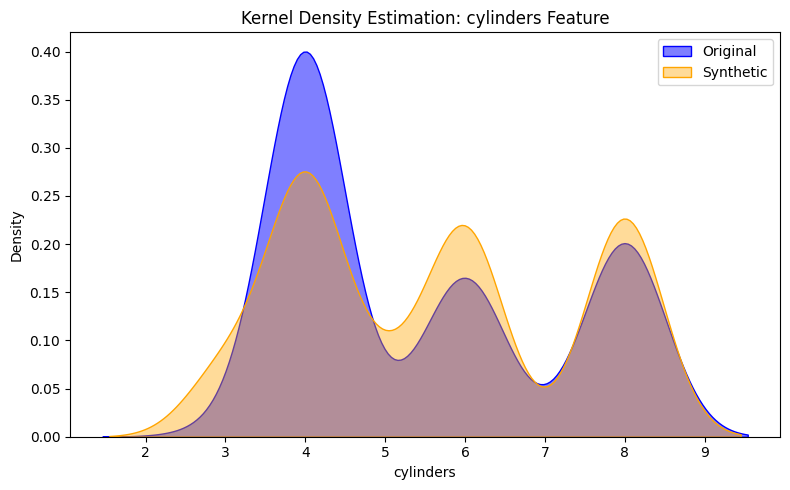

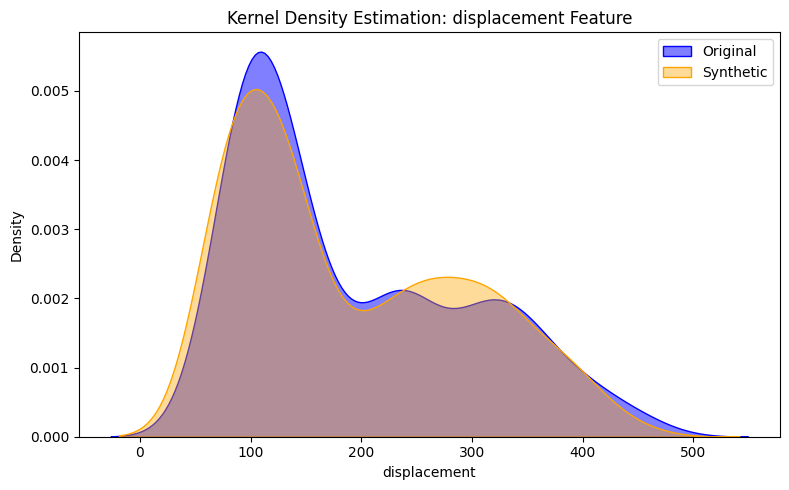

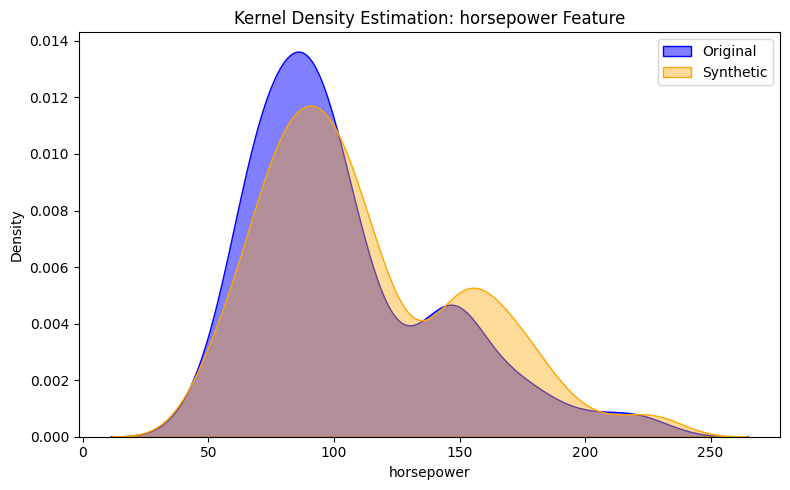

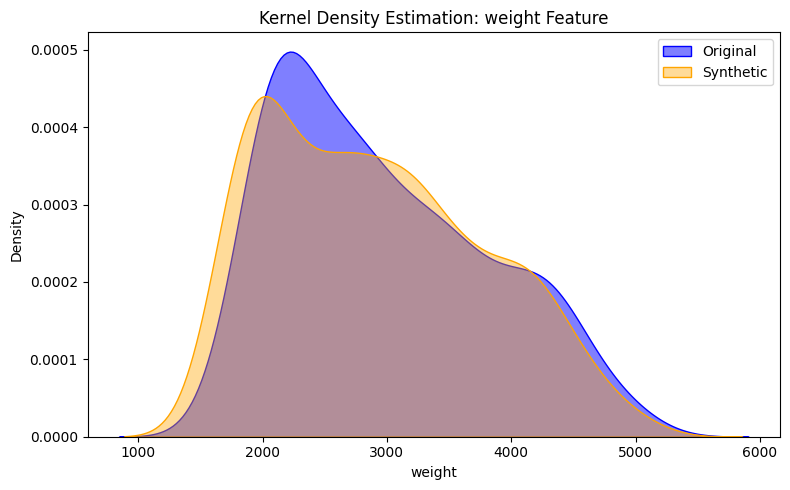

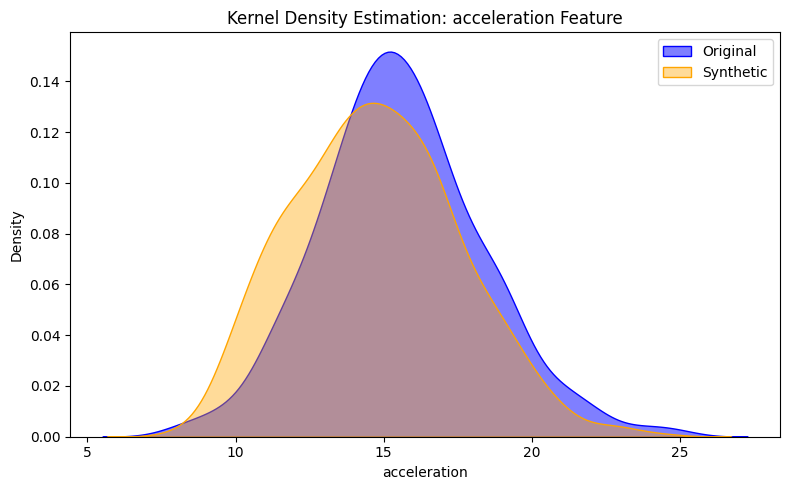

In [25]:
def plot_feature_distribution_kde_overlay(orig_df, synth_df, features, title_suffix=''):
    for feat in features:
        if feat == 'DS TYPE':
            continue
        
        plt.figure(figsize=(8, 5))
        
        sns.kdeplot(orig_df[feat].dropna(), fill=True, color='blue', alpha=0.5, label='Original')
        sns.kdeplot(synth_df[feat].dropna(), fill=True, color='orange', alpha=0.4, label='Synthetic')
        
        plt.xlabel(feat)
        plt.ylabel('Density')
        plt.title(f'Kernel Density Estimation: {feat} {title_suffix}')
        plt.legend()
        plt.tight_layout()
        plt.show()

plot_feature_distribution_kde_overlay(df, synthetic_1, feature_cols, 'Feature')



In [26]:
synthetic_1

,fuel_efficiency_mpg,cylinders,displacement,horsepower,weight,acceleration
0,17.8,6.0,258.4,122.0,2965.0,14.3
1,16.4,8.0,276.4,186.0,4225.0,13.2
2,28.8,4.0,137.5,104.0,2589.0,15.2
3,22.4,8.0,345.2,179.0,4040.0,11.3
4,20.6,6.0,399.9,174.0,3727.0,11.7
...,...,...,...,...,...,...
595,13.7,8.0,271.0,180.0,3994.0,11.0
596,30.8,5.0,106.2,NaN,3133.0,15.9
597,15.4,8.0,279.0,150.0,4275.0,11.6
598,24.6,3.0,68.0,86.0,1877.0,10.0


In [27]:
# # Define the filename for your Excel file
# output_excel_filename = '3_s.xlsx' # Use .xlsx for modern Excel files

# # Save the DataFrame to an Excel file
# # index=False prevents Pandas from writing the DataFrame index as a column in the Excel file

# synthetic_1piece.to_excel(output_excel_filename, index=False)


# print(f"Synthetic data successfully saved to {output_excel_filename}")

